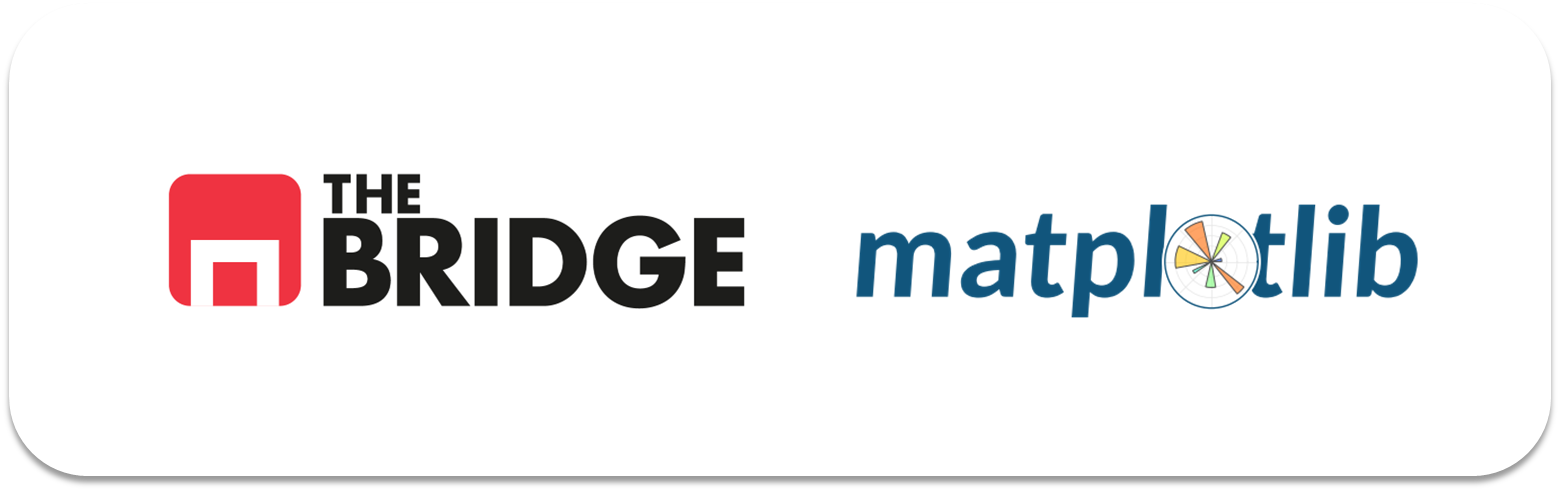

## PRACTICA OBLIGATORIA: **Visualización Básica**

* La práctica obligatoria de esta unidad consiste en un único ejercicio de construcción de gráficas. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

pd.options.mode.copy_on_write = True

### Ejercicio 1

#### #1.1

- Carga el dataset de ciudades de California que está en la ruta "./data/california_cities.csv".  
- Muestra parte de su contenido y su descripción.  
- Deshazte de las filas con nulos.

In [2]:
df = pd.read_csv("data/california_cities.csv", index_col= 0)

In [3]:
df

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 482 entries, 0 to 481
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                482 non-null    object 
 1   latd                482 non-null    float64
 2   longd               482 non-null    float64
 3   elevation_m         434 non-null    float64
 4   elevation_ft        470 non-null    float64
 5   population_total    482 non-null    int64  
 6   area_total_sq_mi    480 non-null    float64
 7   area_land_sq_mi     482 non-null    float64
 8   area_water_sq_mi    481 non-null    float64
 9   area_total_km2      477 non-null    float64
 10  area_land_km2       478 non-null    float64
 11  area_water_km2      478 non-null    float64
 12  area_water_percent  477 non-null    float64
dtypes: float64(11), int64(1), object(1)
memory usage: 52.7+ KB


In [5]:
df.isna().sum().sort_values(ascending=False)

elevation_m           48
elevation_ft          12
area_total_km2         5
area_water_percent     5
area_land_km2          4
area_water_km2         4
area_total_sq_mi       2
area_water_sq_mi       1
city                   0
latd                   0
longd                  0
population_total       0
area_land_sq_mi        0
dtype: int64

Interesante, ¿podemos reconstruir la columna de `elevation_m` con la información de `elevation_ft`?  

Si tenemos tiempo, sí

In [6]:
df["elevation_m_from_ft"] = df.elevation_ft * 0.3048 # Buscamos en internet que un pie son 0.3048 metros

In [7]:
# df.loc[df["elevation_m"].isna(), "elevation_m"] = df.loc[df["elevation_m"].isna(), "elevation_m_from_ft"]
df["elevation_m"] = df["elevation_m"].fillna(df["elevation_m_from_ft"])

In [8]:
df.isna().sum().sort_values(ascending=False)

elevation_ft           12
elevation_m_from_ft    12
elevation_m             8
area_total_km2          5
area_water_percent      5
area_land_km2           4
area_water_km2          4
area_total_sq_mi        2
area_water_sq_mi        1
city                    0
latd                    0
longd                   0
population_total        0
area_land_sq_mi         0
dtype: int64

Como vemos podríamos continuar con las imputaciones:  
- Ahora que tenemos 8 nulos en `elevation_m`, podríamos reconstruir 4 valores en `elevation_ft`
- `area_total_km2` tiene 5 nulos mientras que `area_total_sq_mi` tiene solo 2 nulos
- `area_land_km2`tiene 4 nulos y `area_land_sq_mi` no tiene nulos
- `area_water_km2` tiene 4 nulos y `area_water_sq_mi` tiene solo 1 nulo
- `area_water_percent` tiene 5 nulos pero se trata de un campo calculado, si reconstruimos el resto lo podremos casi completar

Todo esto es para que reflexionéis sobre cuándo podemos o no podemos reconstruir columnas :)  
De momento, quitamos los nulos como nos han pedido.  

In [9]:
df = df.dropna()

#### #1.2  

Recrea la siguiente figura, para ello construye en apartados separados cada gráfico y luego haz un apartado en el que se junten los cuatro.  

Las figuras son:
1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center" o investigar como funciona bar_label). Los colores de las barras deben tener un 50% de transparencia y ser: azul, gris, rojo, aceituna y marrón.  

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Arial", tamaño = 14, peso = "Bold", color azul acero o "steelblue")
3. El scatter de área de agua de un ciudad con su poblacion. Transparencia al 50% y color verde.
4. El boxplot de la altura de las ciudades.

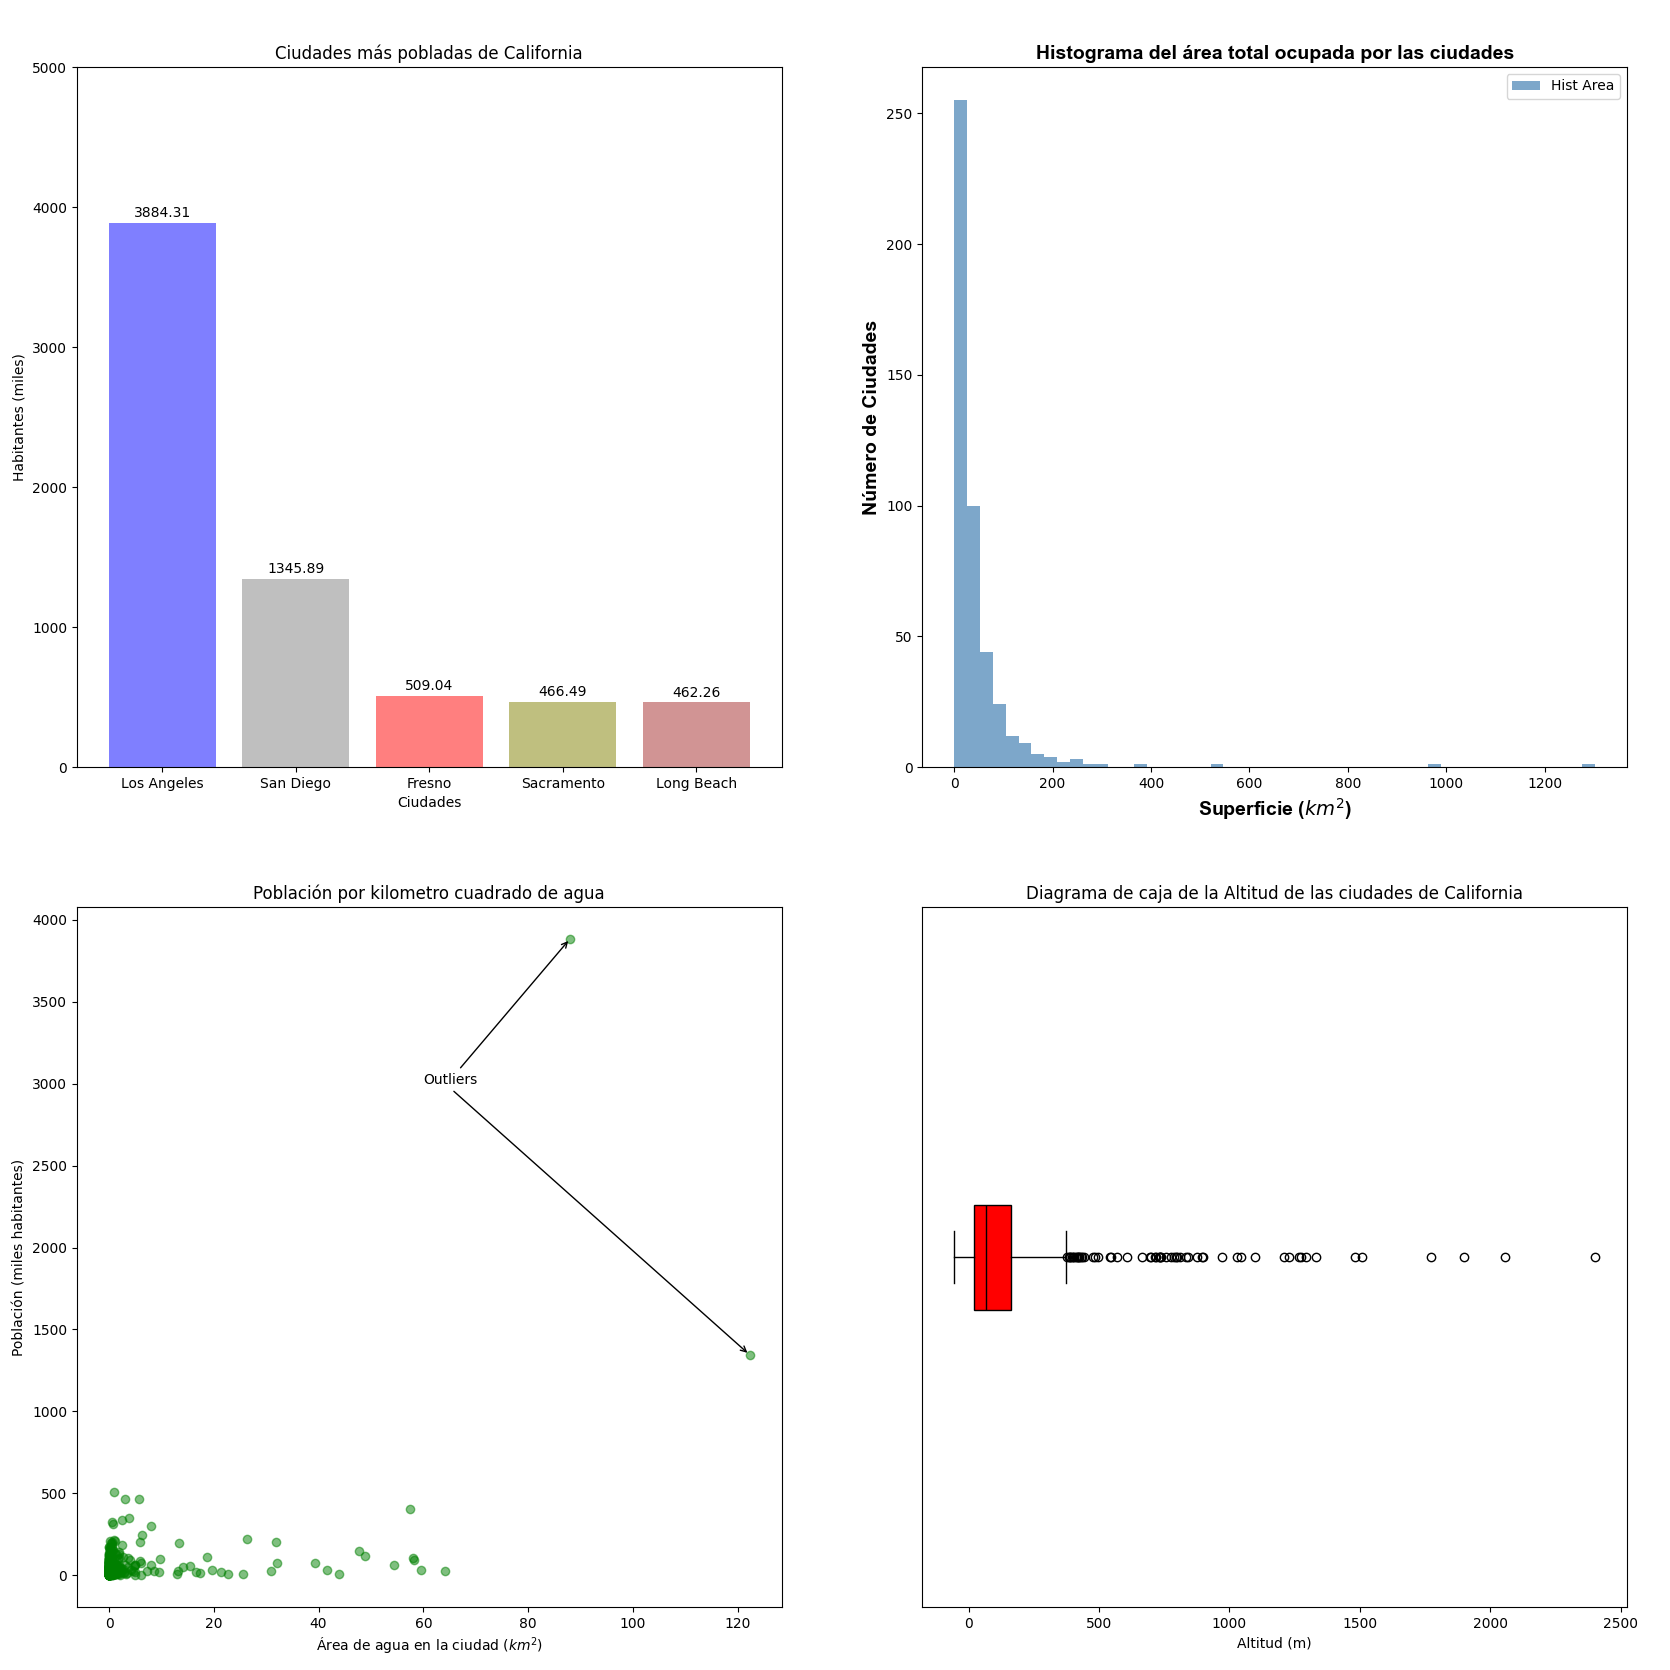

### SOLUCIÓN FIGURA 1 POR SEPARADO

1. Las ciudades más pobladas, con los numeros de las poblaciones (tendrás que usar texto y recordar que para centrarlos se necesita poner el argumento `ha` a "center" o investigar como funciona bar_label). Los colores de las barras deben tener un 50% de transparencia y ser: azul, gris, rojo, aceituna y marrón.  

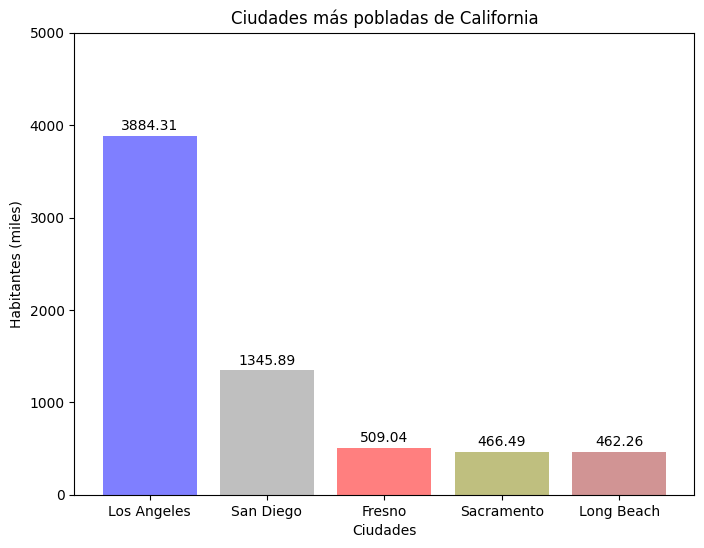

In [10]:
def separa_nombre(nombre):
    nuevo = nombre[0]
    for letra in nombre[1:]:
        if letra == letra.upper():
            nuevo += " "
        nuevo += letra
    return nuevo


df_ciudades_mas_pobladas = df[["city","population_total"]].nlargest(5, columns="population_total").copy()
df_ciudades_mas_pobladas = df_ciudades_mas_pobladas.set_index("city")

ciudades = [separa_nombre(ciudad) for ciudad in df_ciudades_mas_pobladas.index]

colores = ["blue","gray","red","olive","brown"]


plt.figure(figsize=(8,6))

container = plt.bar(x= ciudades, 
                    height= df_ciudades_mas_pobladas["population_total"]/1000,
                    color= colores,
                    alpha= 0.5)

plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

plt.bar_label(container, # Necesitamos guardar previamente el plot en un container
              fmt="{:.2f}",
              padding=2)

# # Otra posibilidad, más complicada:
# for indice, ciudad in enumerate(df_ciudades_mas_pobladas.index):
#     poblacion = df_ciudades_mas_pobladas.loc[ciudad, "population_total"]/1000
#     plt.text(ciudades[indice], poblacion + 50, f"{poblacion}", ha = "center")

plt.show()

### SOLUCIÓN FIGURA 2 POR SEPARADO

2. Histograma del área total ocupada por las ciudades. (50 bins, fuente = "Arial", tamaño = 14, peso = "Bold", color azul acero o "steelblue")

In [11]:
# # Aquí tienes las fuentes disponibles en el gestor de fuentes de matplotlib

# import matplotlib.font_manager as fm

# fonts = sorted(set([f.name for f in fm.fontManager.ttflist]))
# print('\n'.join(fonts))


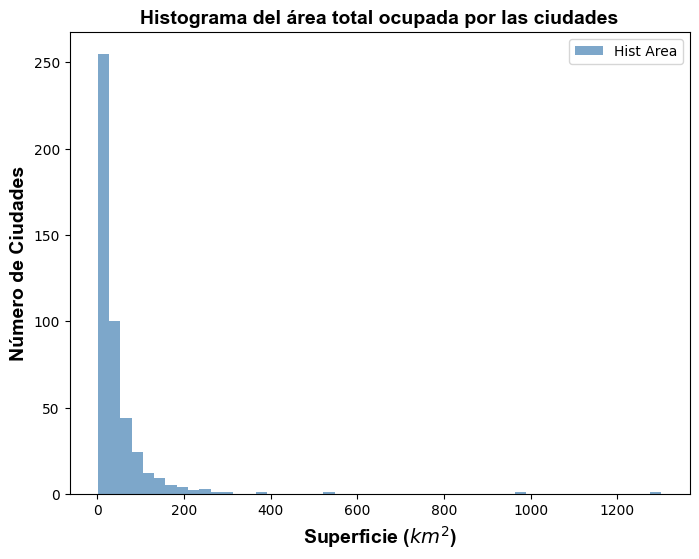

In [12]:
plt.figure(figsize=(8,6))


plt.hist(df["area_total_km2"],
         color= "steelblue",
         alpha= 0.7,
         bins= 50,
         label= "Hist Area")

fontdict = dict(family="Arial", size= 14, weight="bold")

plt.xlabel("Superficie ($km^2$)", fontdict= fontdict)
plt.ylabel("Número de Ciudades", fontdict= fontdict)
plt.title("Histograma del área total ocupada por las ciudades", fontdict= fontdict)
plt.legend()

plt.show()

### SOL FIGURA 3 POR SEPARADO

3. El scatter de área de agua de un ciudad con su poblacion. Transparencia al 50% y color verde. 

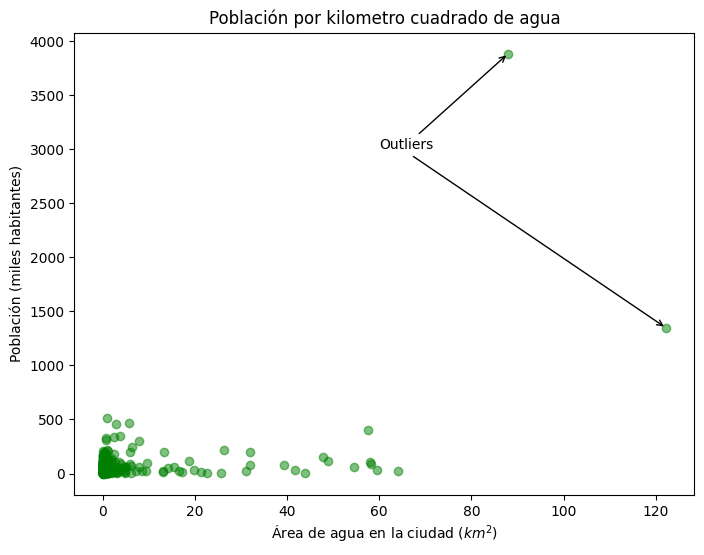

In [13]:
plt.figure(figsize=(8,6))

plt.scatter(x= df["area_water_km2"],
            y= df["population_total"]/1000,
            alpha= 0.5,
            color= "green")

plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)")
plt.title("Población por kilometro cuadrado de agua")

outlier_1_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[1]
outlier_1_x = df.loc[df["population_total"] == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df["population_total"] == outlier_2_y,"area_water_km2"].values[0]

text = "Outliers"
xytext=(60,3000)

plt.annotate(xy= (outlier_1_x, outlier_1_y/1000),
             xytext= xytext,
             text="Outliers",
             arrowprops= dict(arrowstyle = "->"))

plt.annotate(xy= (outlier_2_x, outlier_2_y/1000),
             xytext= xytext,
             text=" " * len(text),
             arrowprops= dict(arrowstyle = "->"))

plt.show()

### SOL FIGURA 4 POR SEPARADO

4. El boxplot de la altura de las ciudades.

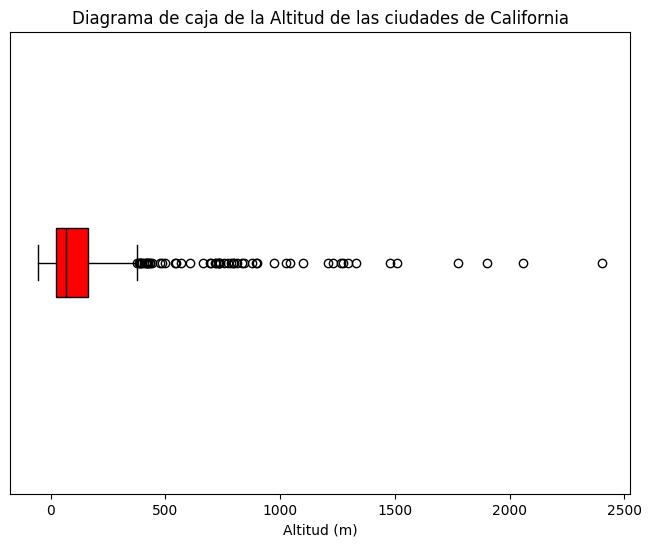

In [14]:
plt.figure(figsize=(8,6))

plt.boxplot(df["elevation_m"],
            vert= False,
            patch_artist= True, # Sin patch_artist=True no nos aceptará las ediciones posteriores
            boxprops = dict(facecolor = "red"),
            medianprops = dict(color= "black"))

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.yticks([]) # Con yticks podemos quitar el ticker del eje y (el 1 que salía por defecto)

plt.show()

### SOL TODAS JUNTAS - SINTAXIS TIPO MATLAB CON **PLT.SUBPLOT()**

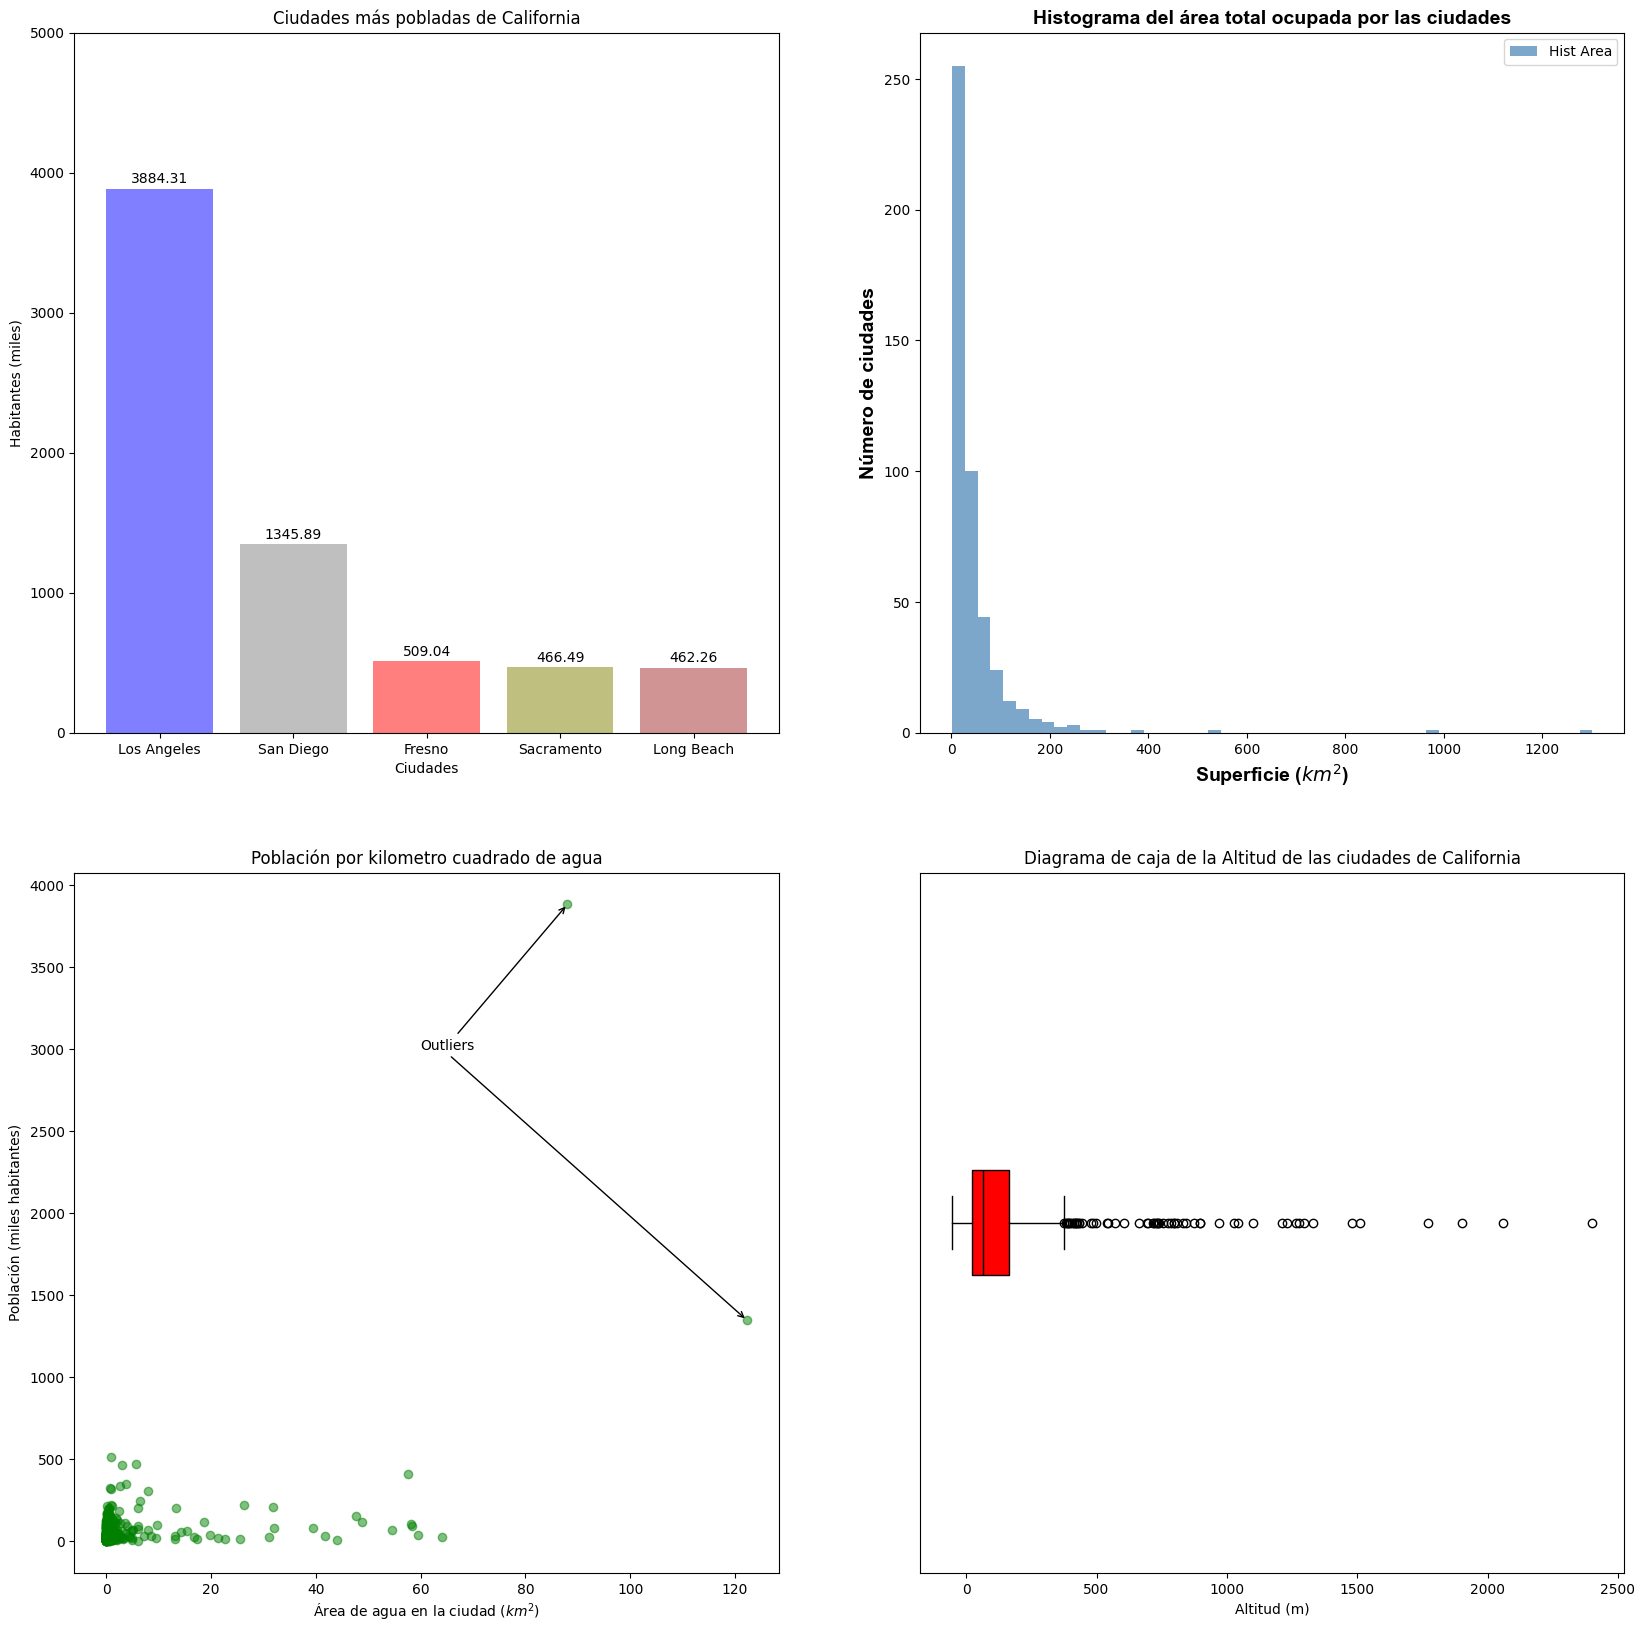

In [15]:
# Todas juntas con plt.subplot()

plt.figure(figsize=(20,20))

# Primera figura
plt.subplot(2,2,1)

df_ciudades_mas_pobladas = df[["city","population_total"]].nlargest(5, columns="population_total").copy()
df_ciudades_mas_pobladas = df_ciudades_mas_pobladas.set_index("city")

ciudades = [separa_nombre(ciudad) for ciudad in df_ciudades_mas_pobladas.index]
colores = ["blue","gray","red","olive","brown"]

container = plt.bar(x= ciudades,
                    height= df_ciudades_mas_pobladas["population_total"]/1000, 
                    color = colores, 
                    alpha = 0.5)

plt.ylim([0,5000])
plt.ylabel("Habitantes (miles)")
plt.xlabel("Ciudades")
plt.title("Ciudades más pobladas de California")

plt.bar_label(container,
              fmt="{:.2f}",
              padding=2)

# Segunda figura
plt.subplot(2,2,2)

plt.hist(df["area_total_km2"],
         color = "steelblue",
         alpha = 0.7,
         bins = 50,
         label = "Hist Area")

fontdict = dict(family="Arial", size= 14, weight="bold")

plt.xlabel("Superficie ($km^2$)", fontdict = fontdict)
plt.ylabel("Número de ciudades", fontdict= fontdict)
plt.title("Histograma del área total ocupada por las ciudades", fontdict= fontdict)
plt.legend()

# Tercera figura
plt.subplot(2,2,3)

plt.scatter(df["area_water_km2"], 
            df["population_total"]/1000, 
            alpha = 0.5, 
            color = "green")

plt.xlabel("Área de agua en la ciudad ($km^2$)")
plt.ylabel("Población (miles habitantes)")
plt.title("Población por kilometro cuadrado de agua")

outlier_1_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[1]
outlier_1_x = df.loc[df["population_total"] == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df["population_total"] == outlier_2_y,"area_water_km2"].values[0]

xytext= (60,3000)
text = "Outliers"

plt.annotate(xy= (outlier_1_x,outlier_1_y/1000), 
             xytext= xytext, 
             text= text, 
             arrowprops= dict(arrowstyle = "->"))

plt.annotate(xy= (outlier_2_x,outlier_2_y/1000), 
             xytext= xytext, 
             text= " " * len(text), 
             arrowprops= dict(arrowstyle = "->"))

# Cuarta figura
plt.subplot(2,2,4)

plt.boxplot(df["elevation_m"],
            vert= False, 
            patch_artist= True,
            boxprops = dict(facecolor= "red"), 
            medianprops = dict(color= "black"))

plt.xlabel("Altitud (m)")
plt.title("Diagrama de caja de la Altitud de las ciudades de California")
plt.yticks([])

plt.show()

### SOL TODAS JUNTAS - SINTAXIS TIPO OOP CON **PLT.SUBPLOTS()**

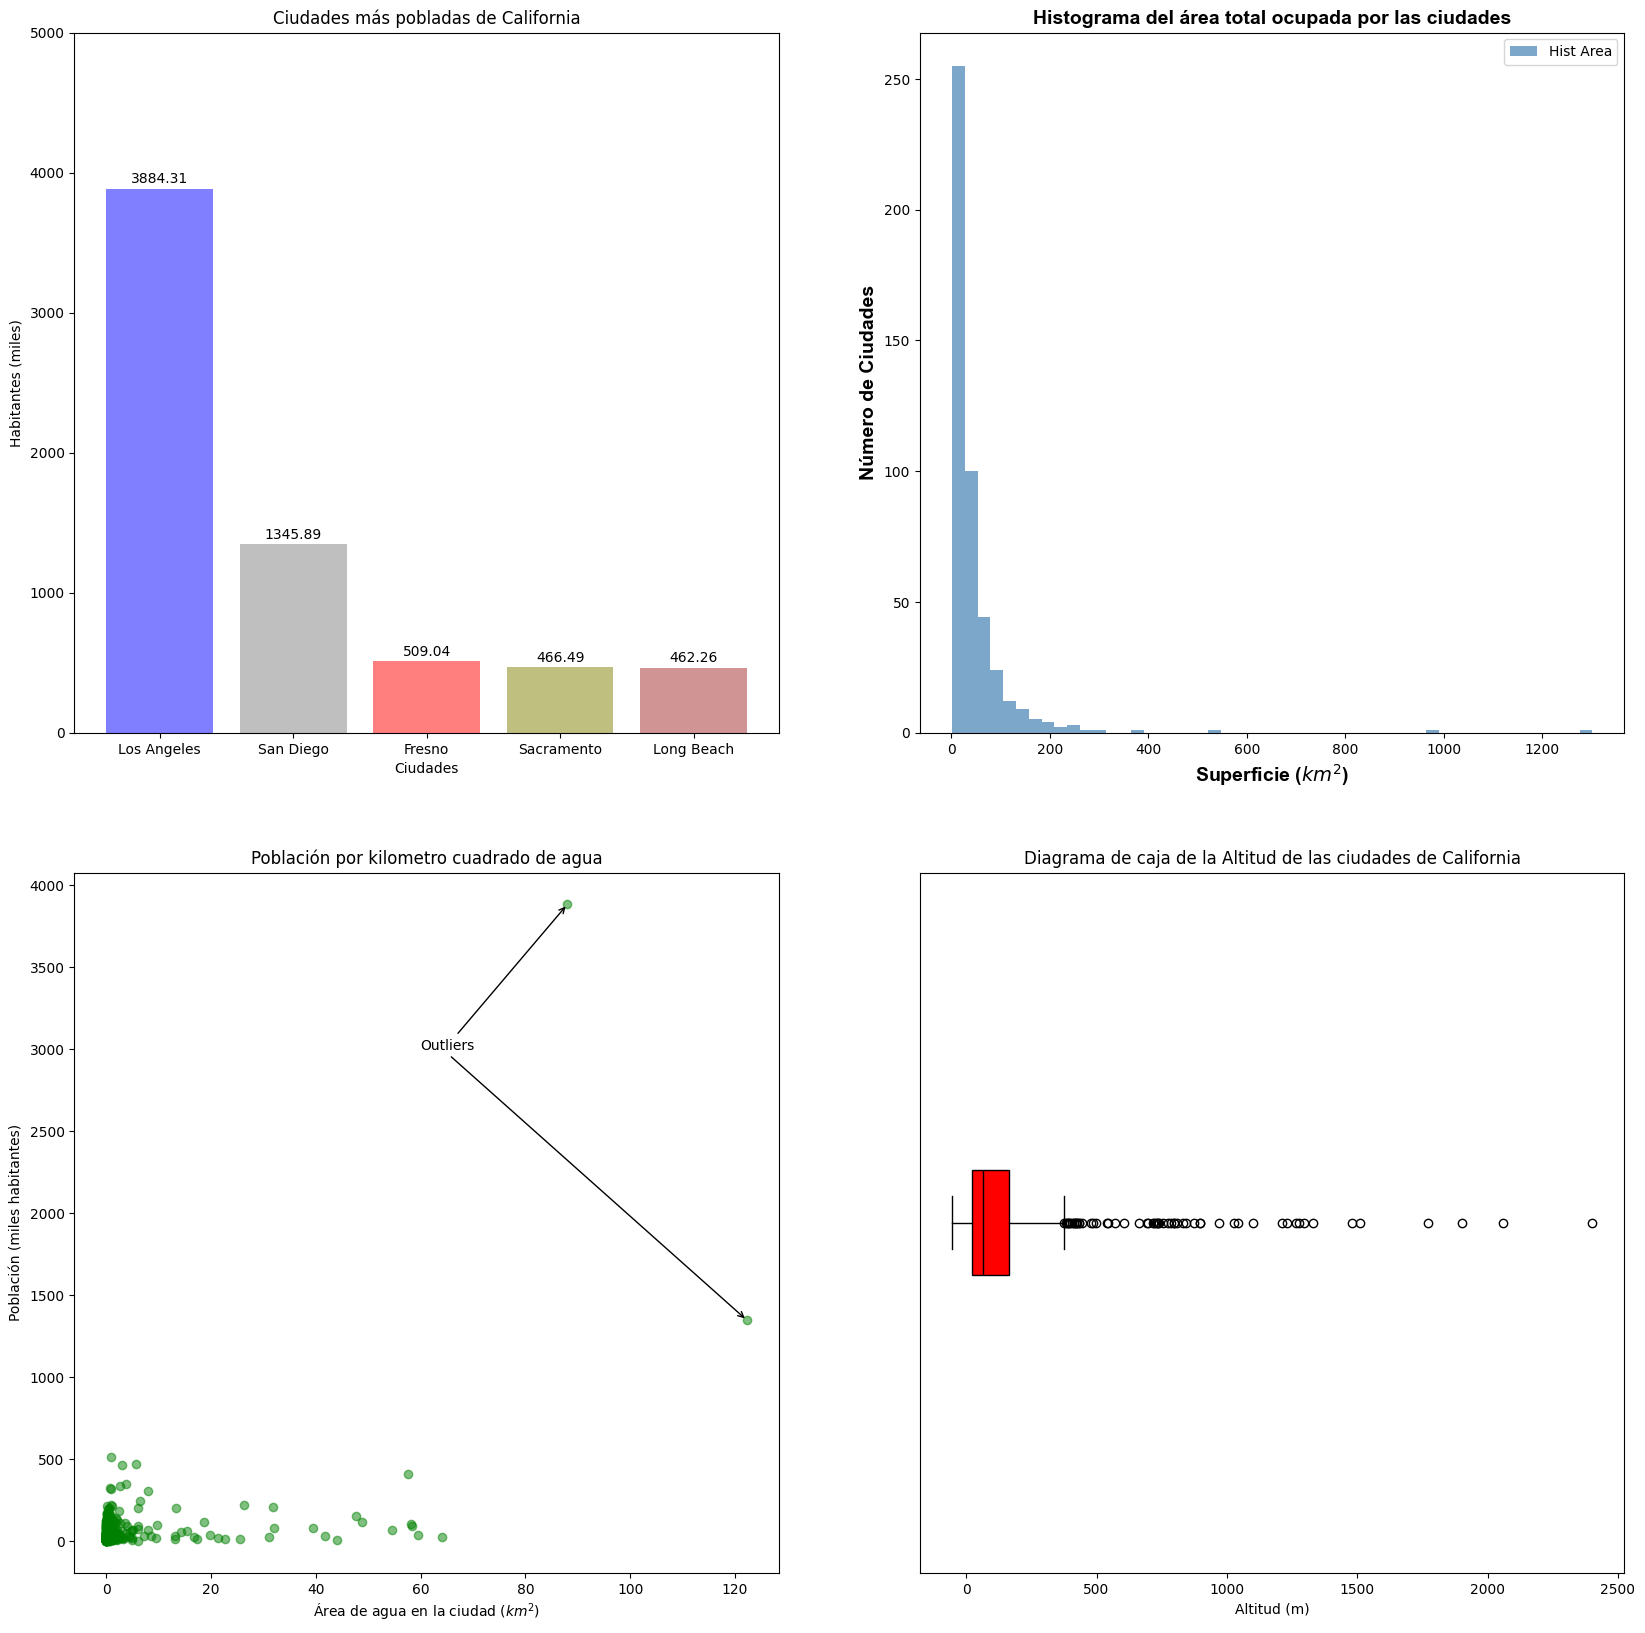

In [16]:
# Todas juntas con plt.subplots()

fig, axs = plt.subplots(2,2, figsize = (20,20))
axs = axs.flatten() # Aplanamos el objeto axs

# Primera figura
primera = axs[0]

df_ciudades_mas_pobladas = df[["city","population_total"]].nlargest(5, columns="population_total").copy()
df_ciudades_mas_pobladas = df_ciudades_mas_pobladas.set_index("city")

ciudades = [separa_nombre(ciudad) for ciudad in df_ciudades_mas_pobladas.index]
colores = ["blue","gray","red","olive","brown"]

container = primera.bar(x= ciudades, 
                        height= df_ciudades_mas_pobladas["population_total"]/1000, 
                        color= colores, 
                        alpha= 0.5)

primera.set_ylim([0,5000])
primera.set_ylabel("Habitantes (miles)")
primera.set_xlabel("Ciudades")

primera.bar_label(container,
                  fmt="{:.2f}",
                  padding=2)

primera.set_title("Ciudades más pobladas de California")

# Segunda gráfica
segunda = axs[1]

segunda.hist(df["area_total_km2"], 
             color = "steelblue", 
             alpha = 0.7, 
             bins = 50, 
             label = "Hist Area")

fontdict = dict(family="Arial", size= 14, weight="bold")

segunda.set_xlabel("Superficie ($km^2$)", fontdict= fontdict)
segunda.set_ylabel("Número de Ciudades", fontdict= fontdict)
segunda.set_title("Histograma del área total ocupada por las ciudades", fontdict= fontdict)
segunda.legend()


# Tercera gráfica
tercera = axs[2]

tercera.scatter(df["area_water_km2"], 
                df["population_total"]/1000, 
                alpha = 0.5, 
                color = "green")

tercera.set_xlabel("Área de agua en la ciudad ($km^2$)")
tercera.set_ylabel("Población (miles habitantes)")
tercera.set_title("Población por kilometro cuadrado de agua")

outlier_1_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[0]
outlier_2_y = df_ciudades_mas_pobladas["population_total"].nlargest(2).iloc[1]
outlier_1_x = df.loc[df["population_total"] == outlier_1_y,"area_water_km2"].values[0]
outlier_2_x = df.loc[df["population_total"] == outlier_2_y,"area_water_km2"].values[0]

xytext= (60,3000)
text = "Outliers"

tercera.annotate(xy= (outlier_1_x,outlier_1_y/1000), 
                 xytext= xytext, 
                 text= text,
                 arrowprops= dict(arrowstyle = "->"))

tercera.annotate(xy= (outlier_2_x,outlier_2_y/1000), 
                 xytext= xytext, 
                 text = " " * len(text),
                 arrowprops= dict(arrowstyle = "->"))

# Cuarta gráfica
cuarta = axs[3]

cuarta.boxplot(df["elevation_m"], 
               vert = False, 
               patch_artist= True,
               boxprops = dict(facecolor = "red"),
               medianprops = dict(color= "black"))

cuarta.set_xlabel("Altitud (m)")
cuarta.set_title("Diagrama de caja de la Altitud de las ciudades de California")
cuarta.set_yticks([])

plt.show()


#### #1.3

Graba la figura en un archivo .png y sube el archivo a tu repositorio personal junto con el notebook.

In [17]:
fig.savefig("practica_obligatoria.png")

---

### EXTRA: INSTALAR FUENTES EN MATPLOTLIB

In [18]:
# # Para instalar diferentes fuentes en Matplotlib, hay que hacerlo en su propio fontmanager
# # Para encontrar la ruta a la carpeta de fuentes de Matplotib puedes usar matplotlib.font_manager.findfont

import matplotlib.font_manager as fm

print(fm.findfont("DejaVu Sans"))


C:\Users\rodri\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\mpl-data\fonts\ttf\DejaVuSans.ttf


In [19]:
# # Una vez encontrada la ruta, debes usarla para buscar el directorio y copiar allí el archivo ttf de tu fuente
# # Una vez instalada la fuente en el gestor, si Matplotlib no la detecta entonces hay que borrar la caché
# # Lo explican muy bien en este hilo de stackoverflow:
# # https://stackoverflow.com/questions/26085867/matplotlib-font-not-found

# # Para encontrar la ruta de la caché debes usar print(matplotlib.get_cachedir())
# # Visita el directorio de la ruta indicada y borra el archivo json, ese archivo es la caché de matplotlib
# # Una vez borrado el json, reinicia el cuaderno y prueba a encontrar la fuente

import matplotlib

print(matplotlib.get_cachedir())

C:\Users\rodri\.matplotlib
